# Fitting a line using a custom NN

In [1]:
import torch
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F

from torch.optim.lr_scheduler import StepLR

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda:0


In [3]:
x = (torch.arange(50) + 1.0).to(device)
d = x + 2 * (torch.rand(50).to(device)) - 1

# Add extra dimension for NN input
x = x.unsqueeze(1)
d = d.unsqueeze(1)

In [4]:
class MyNetwork(nn.Module):
    def __init__(self):
        super(MyNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 500)
        self.fc3 = nn.Linear(500, 500)
        self.fc2 = nn.Linear(500, 1)
        
    def forward(self, x):
        x = self.fc1((x - 25.0) / 5.0)
        x = F.tanh(x)
        x = self.fc3(x)
        x = F.tanh(x)
        x = 50 * self.fc2(x)
        return x

In [5]:
network = MyNetwork().to(device)
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)
scheduler = StepLR(optimizer, step_size=2000, gamma=0.9)
loss_fn = nn.MSELoss()

In [6]:
for t in range(100_000):
    y = network(x)
    loss = loss_fn(y, d)
    
    if (t % 100 == 0):
        print(f"Step {t}: loss = {loss.item()}")
        
    if (loss < 1e-4):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()

Step 0: loss = 934.4171752929688
Step 100: loss = 0.7250391244888306
Step 200: loss = 0.1745525449514389
Step 300: loss = 0.15309450030326843
Step 400: loss = 0.14748597145080566
Step 500: loss = 0.14530916512012482
Step 600: loss = 0.14391814172267914
Step 700: loss = 0.14277638494968414
Step 800: loss = 0.14178086817264557
Step 900: loss = 0.14092674851417542
Step 1000: loss = 0.14021725952625275
Step 1100: loss = 0.13963688910007477
Step 1200: loss = 0.1391478329896927
Step 1300: loss = 0.1387137770652771
Step 1400: loss = 0.1383170485496521
Step 1500: loss = 0.13794954121112823
Step 1600: loss = 0.13760574162006378
Step 1700: loss = 0.13728846609592438
Step 1800: loss = 0.1369992047548294
Step 1900: loss = 0.136734277009964
Step 2000: loss = 0.21897977590560913
Step 2100: loss = 0.1362832635641098
Step 2200: loss = 23.547876358032227
Step 2300: loss = 2.5458602905273438
Step 2400: loss = 5.700972557067871
Step 2500: loss = 0.23179668188095093
Step 2600: loss = 0.7804848551750183
St

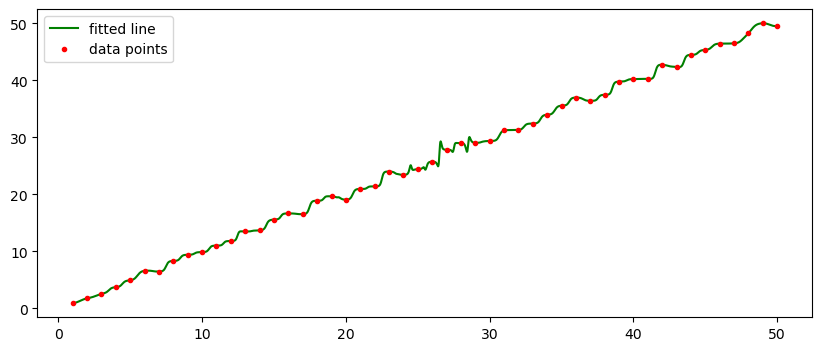

In [7]:
plt.figure(figsize=(10,4))

fine_x = torch.arange(1, 50.0, 0.01).to(device)
fine_x = fine_x.unsqueeze(1)

plt.plot(fine_x.detach().cpu(), network(fine_x).detach().cpu(), 'g-', label='fitted line')
plt.plot(x.detach().cpu(), d.detach().cpu(), 'r.', label='data points')

plt.legend()
plt.show()